In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


n_estimators = [20,30,40,60,80,100,120,140,180,200]


logistic_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1,10,50,100],
    "dual": [True, False],
    "fit_intercept": [True, False],
    "multi_class": ["ovr", "multinomial"],
}

tree_grid = {
    'criterion': ['gini', 'entropy'],
    "splitter" : ["best", "random"],
    "max_depth": [1, 5, 10, 20, 40, 60, 80, 100, 120, 150, 200],
    "min_samples_split": [2, 5, 10],
    "max_features": [0.01,0.1,0.2,0.4,0.8],
}

ada_grid = {
    "n_estimators": n_estimators,
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    "algorithm": ["SAMME", "SAMME.R"],
}


svc_grid = {
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"],
    "multi_class": ["ovr", "crammer_singer"],
}

rf_grid = {
    "n_estimators": n_estimators,
    "max_features": ["auto", "sqrt"],
    "max_depth": [1, 5, 10, 20, 40, 60, 80, 100, 120, 150, 200],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}


data = pd.read_csv("output_RF.csv", 
                   names = ["score","time"]+list(rf_grid.keys()),
                   converters={"max_features": lambda x: x == "auto", "loss": lambda x: x == "hinge", "multi_class": lambda x: x=="ovr"},
                  ).dropna()

print(data[:10])



      score      time  n_estimators  max_features  max_depth  \
0  0.193313  0.145112            20          True          1   
1  0.212513  0.151347            30          True          1   
2  0.255891  0.153585            40          True          1   
3  0.290707  0.248586            60          True          1   
4  0.351820  0.280250            80          True          1   
5  0.362768  0.302191           100          True          1   
6  0.372501  0.448550           120          True          1   
7  0.387294  0.459770           140          True          1   
8  0.411966  0.622834           180          True          1   
9  0.403545  0.627322           200          True          1   

   min_samples_split  min_samples_leaf  bootstrap  
0                  2                 1       True  
1                  2                 1       True  
2                  2                 1       True  
3                  2                 1       True  
4                  2               

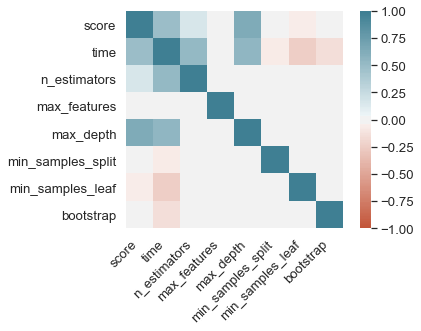

In [41]:
corr = data.corr()
sns.set(font_scale=1.2)
ax = sns.heatmap(
        corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
        square=True
)
ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
)

plt.show()


      score      time  n_estimators max_features  max_depth  \
0  0.193313  0.145112            20         auto          1   
1  0.212513  0.151347            30         auto          1   
2  0.255891  0.153585            40         auto          1   
3  0.290707  0.248586            60         auto          1   
4  0.351820  0.280250            80         auto          1   
5  0.362768  0.302191           100         auto          1   
6  0.372501  0.448550           120         auto          1   
7  0.387294  0.459770           140         auto          1   
8  0.411966  0.622834           180         auto          1   
9  0.403545  0.627322           200         auto          1   

   min_samples_split  min_samples_leaf  bootstrap  
0                  2                 1       True  
1                  2                 1       True  
2                  2                 1       True  
3                  2                 1       True  
4                  2                 1       T

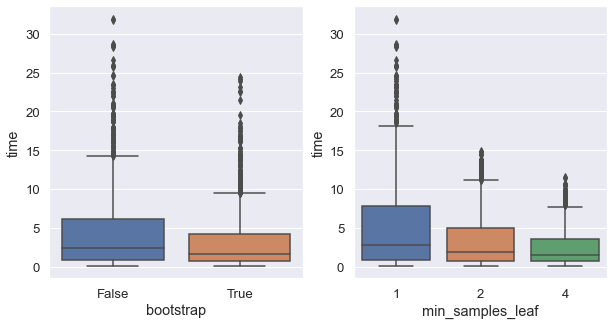

In [43]:
data = pd.read_csv("output_RF.csv", 
                   names = ["score","time"]+list(rf_grid.keys()),
                  ).dropna()

print(data[:10])

plt.figure(figsize=(10, 5))
plt.axis("equal")
plt.subplot(1, 2, 1)   
sns.boxplot( y=data["time"], x=data["bootstrap"] )
plt.subplot(1, 2, 2)   
sns.boxplot( y=data["time"], x=data["min_samples_leaf"] );
plt.show()

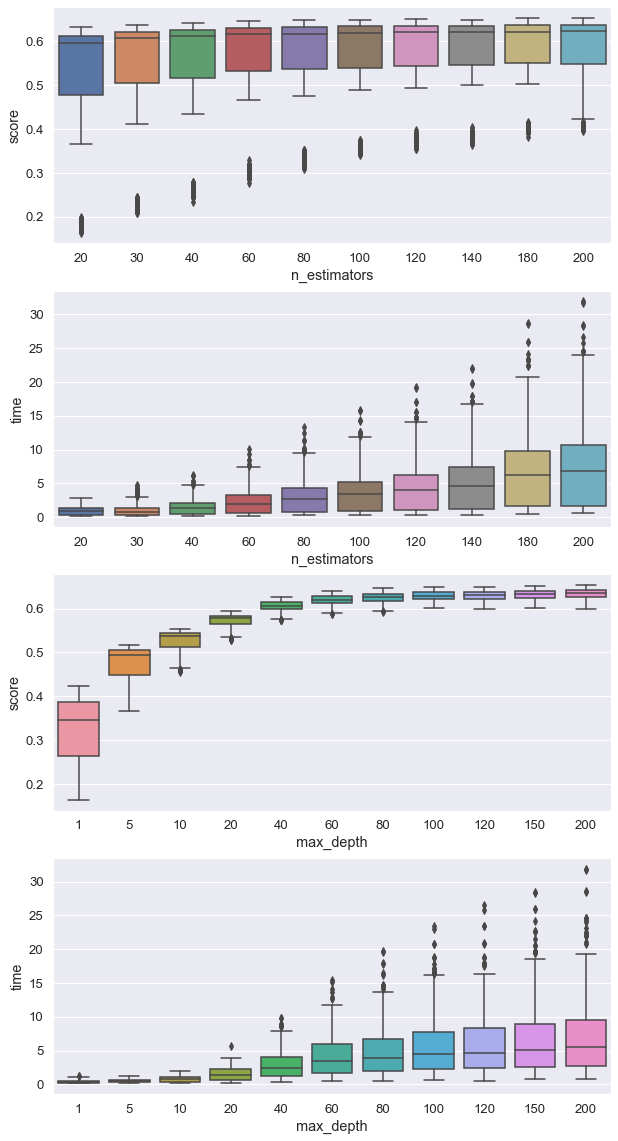

In [44]:
plt.figure(figsize=(10, 20))
plt.axis("equal")
plt.subplot(4, 1, 1)   
sns.boxplot( y=data["score"], x=data["n_estimators"] )
plt.subplot(4, 1, 2)
sns.boxplot( y=data["time"], x=data["n_estimators"] )
plt.subplot(4, 1, 3)   
sns.boxplot( y=data["score"], x=data["max_depth"] )
plt.subplot(4, 1, 4)
sns.boxplot( y=data["time"], x=data["max_depth"] )
plt.show()